<a href="https://colab.research.google.com/github/muthonioprah/Maize-Crop-Disease-Detection-Using-Machine-Learning-and-Computer-Vision/blob/main/Crop_Disease_Detection_Using_Machine_Learning_and_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importing the necessary packages and libraries
import numpy as np
from tqdm import tqdm
import cv2
from collections import defaultdict
from urllib import request
import os
import pandas as pd
import numpy as np
from urllib import request
import cv2
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.layers import Dropout,Dense
from keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
import os
from tensorflow.keras.applications import VGG16
import json
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import tensorflow
import tensorflow as tf
from collections import deque

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#assigning our values to variables
batches = 50
image_size = 256
channels= 3
epochs=80


In [8]:
#create a dataset
df = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Maize/Dataset Copy",
    seed=123,
    image_size=(image_size, image_size),
    shuffle=True,
    batch_size= batches
)

Found 582 files belonging to 6 classes.


In [5]:
# count=0
# if count<5:
#   for element in df:
#       print(element)
#       count+=1
type(df)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [9]:
#displaying class names
categories = df.class_names
categories

['Healthy Maize',
 'Maize Common rust_',
 'Maize Gray leaf spot',
 'Maize Head smut',
 'Maize northern leaf blight',
 'Maize streak disease']

In [ ]:
    # import imghdr

    # def check_images( s_dir, ext_list):
    #     bad_images=[]
    #     bad_ext=[]
    #     s_list= os.listdir(s_dir)
    #     for klass in s_list:
    #         klass_path=os.path.join (s_dir, klass)
    #         print ('processing class directory ', klass)
    #         if os.path.isdir(klass_path):
    #             file_list=os.listdir(klass_path)
    #             for f in file_list:               
    #                 f_path=os.path.join (klass_path,f)
    #                 tip = imghdr.what(f_path)
    #                 if ext_list.count(tip) == 0:
    #                   bad_images.append(f_path)
    #                 if os.path.isfile(f_path):
    #                     try:
    #                         img=cv2.imread(f_path)
    #                         shape=img.shape
    #                     except:
    #                         print('file ', f_path, ' is not a valid image file')
    #                         bad_images.append(f_path)
    #                 else:
    #                     print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
    #         else:
    #             print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    #     return bad_images, bad_ext

    # source_dir =r'/content/drive/MyDrive/Maize/Dataset'
    # good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
    # bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
    # if len(bad_file_list) !=0:
    #     print('improper image files are listed below')
    #     for i in range (len(bad_file_list)):
    #         print (bad_file_list[i])
    # else:
    #     print(' no improper image files were found')

In [10]:
for image_batch, labels_batch in df.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(50, 256, 256, 3)
[1 5 4 0 0 3 5 2 2 5 0 1 3 4 3 1 1 0 2 2 4 2 2 3 4 4 4 1 5 0 4 5 2 2 1 1 1
 1 2 5 5 3 5 4 0 5 3 5 4 1]


In [ ]:
#image_batch, labels_batch = 
df.take(10)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

DATA PREPROCESSING

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


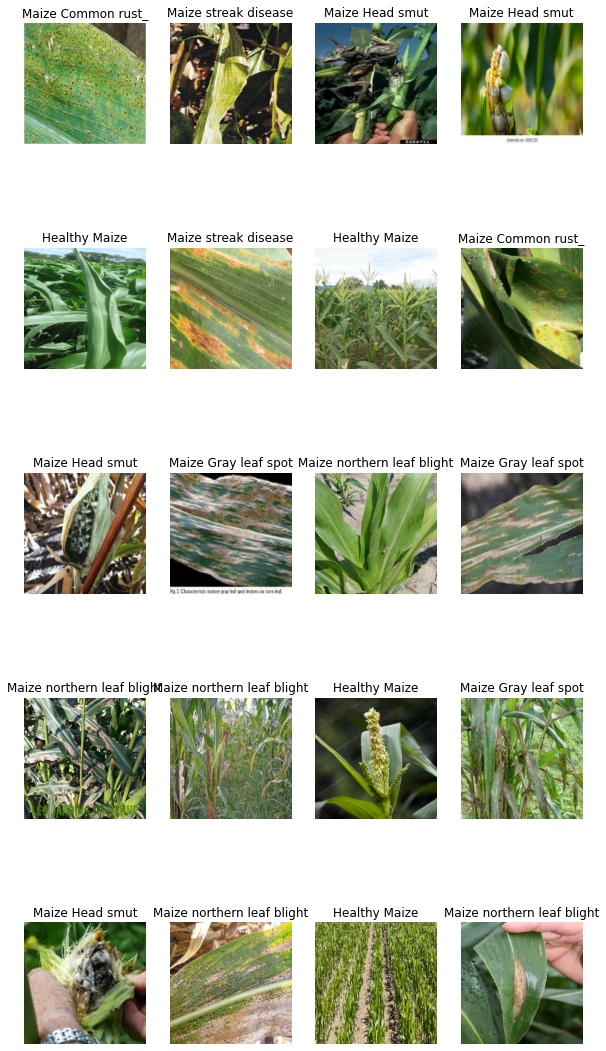

In [15]:
#Visualize some of the images from our dataset
plt.figure(figsize=(10, 20))
for image_batch, labels_batch in df.take(20):
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(categories[labels_batch[i]])
        plt.axis("off")


In [20]:
#checking dataset length
len(df)
train_size = 0.8
print(len(df)*train_size)

#train_df = df.take()
#len(train_df)



TypeError: ignored

In [ ]:
from collections import defaultdict
test_df = defaultdict.skip(12)
len(test_df)

test_df = test_df.skip()
len(test_df)

In [ ]:
val_size= 0.1
len(df)*val_size

val_df = test_df.take(6)
len(val_df)

In [ ]:
#Splitting the dataset to train and test
def get_dataset_partitions_tf(df, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
#Compiling the Model
#We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_df,
    verbose=1,
    epochs=50,
)